In [4]:
import numpy as np
import nibabel as nib
from scipy.stats import mode
import matplotlib.pyplot as plt

In [5]:
def fill_holes_3d(image: np.ndarray, 
                 threshold: int = 1, 
                 strategy: str = "majority", 
                 verbose: bool = False) -> np.ndarray:
    """
    Function for searching and filling wrong 0-class voxels using 3^3 windows
    Notes:
        image (np.ndarray): 3D image of shape [H, D, W]
        threshold (int): max wrong 0 class for filling (default is 1)
        strategy (str): filling strategy，["nearest", "majority"] (default is majority)
        verbose (bool): display progress (default is False)
    """
    filled = np.copy(image)
    D, H, W = image.shape
    neighbor_offsets = [
        (dd, hh, ww) 
        for dd in [-1, 0, 1]
        for hh in [-1, 0, 1]
        for ww in [-1, 0, 1]
        if not (dd == 0 and hh == 0 and ww == 0)
    ]
    neighbor_distances = [
        np.sqrt(dd**2 + hh**2 + ww**2)
        for dd, hh, ww in neighbor_offsets
    ]

    for d in range(D):
        if verbose:
            print(f"Processing depth {d+1}/{D}...")
            
        for h in range(H):
            for w in range(W):
                # only for 0-class wrong labels
                if filled[d, h, w] != 0:
                    continue

                zero_count = 0
                candidates = []
                
                for (dd, hh, ww), dist in zip(neighbor_offsets, neighbor_distances):
                    x = d + dd
                    y = h + hh
                    z = w + ww

                    if 0 <= x < D and 0 <= y < H and 0 <= z < W:
                        val = filled[x, y, z]

                        if val == 0:
                            zero_count += 1
                        else:
                            candidates.append((val, dist))

                if zero_count > threshold or len(candidates) == 0:
                    continue
                
                # filling strategy (majority maybe better)
                if strategy == "nearest":
                    min_dist = min([dist for _, dist in candidates])
                    nearest_vals = [val for val, dist in candidates if dist == min_dist]
                    fill_val = mode(nearest_vals).mode[0]
                elif strategy == "majority":
                    fill_val = mode([val for val, _ in candidates]).mode[0]
                else:
                    raise ValueError("wrong")

                filled[d, h, w] = fill_val
    
    return filled

In [ ]:
# usage example
noisy_labels = ... # ndarray of shape [H, D, W]
filled_labels = fill_holes_3d(noisy_labels, threshold=2, strategy="majority", verbose=True)

# Visualization

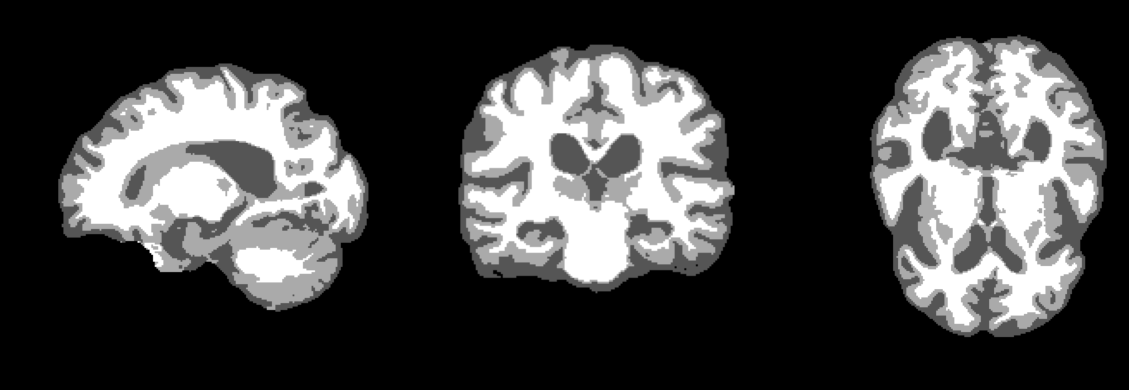

In [7]:
# test
fsl_seg = nib.load("output/fsl_output/output_prefix_seg.nii.gz").get_fdata()
fsl_seg = fsl_seg.transpose(0,2,1)
plt.rcParams['figure.facecolor'] = 'black'
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(np.rot90(fsl_seg[100, :, :],-1),'gray')
axes[1].imshow(np.rot90(fsl_seg[:, 100, :],-1),'gray')
axes[2].imshow(np.rot90(fsl_seg[:, :, 100],-1),'gray')
for ax in axes.flatten():
    ax.set_axis_off()
    ax.grid(False)
fig.tight_layout()
plt.show()

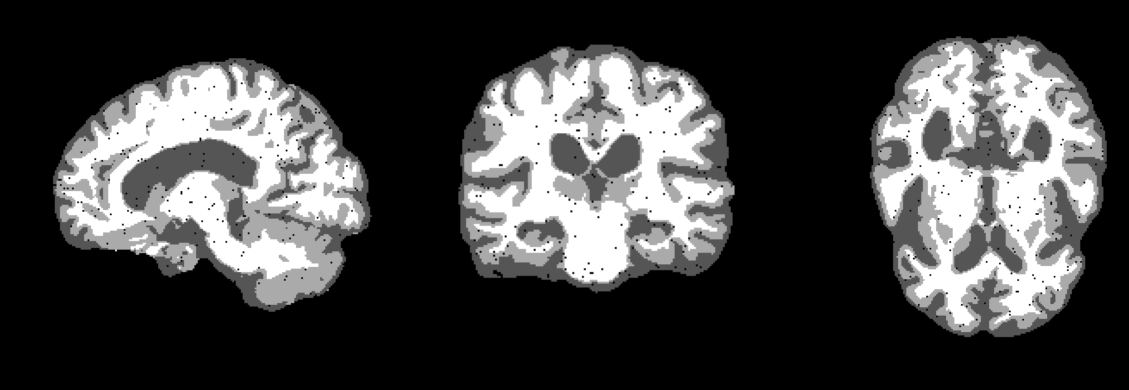

In [9]:
seg_np = fsl_seg.copy()
noise_ratio = 0.01
noise_mask = np.random.rand(*seg_np.shape) < noise_ratio
noise_mask = noise_mask.astype(np.uint8)==0
noise_seg = noise_mask*seg_np
plt.rcParams['figure.facecolor'] = 'black'
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(np.rot90(noise_seg[66, :, :],-1),'gray')
axes[1].imshow(np.rot90(noise_seg[:, 100, :],-1),'gray')
axes[2].imshow(np.rot90(noise_seg[:, :, 100],-1),'gray')
for ax in axes.flatten():
    ax.set_axis_off()
    ax.grid(False)
fig.tight_layout()
plt.show()

In [10]:
fill_test = fill_holes_3d(noise_seg, threshold=2, strategy="majority", verbose=True)

Processing depth 1/160...
Processing depth 2/160...
Processing depth 3/160...
Processing depth 4/160...
Processing depth 5/160...
Processing depth 6/160...
Processing depth 7/160...
Processing depth 8/160...
Processing depth 9/160...
Processing depth 10/160...


/tmp/ipykernel_2481949/1179245550.py:62: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  fill_val = mode([val for val, _ in candidates]).mode[0]


Processing depth 11/160...
Processing depth 12/160...
Processing depth 13/160...
Processing depth 14/160...
Processing depth 15/160...
Processing depth 16/160...
Processing depth 17/160...
Processing depth 18/160...
Processing depth 19/160...
Processing depth 20/160...
Processing depth 21/160...
Processing depth 22/160...
Processing depth 23/160...
Processing depth 24/160...
Processing depth 25/160...
Processing depth 26/160...
Processing depth 27/160...
Processing depth 28/160...
Processing depth 29/160...
Processing depth 30/160...
Processing depth 31/160...
Processing depth 32/160...
Processing depth 33/160...
Processing depth 34/160...
Processing depth 35/160...
Processing depth 36/160...
Processing depth 37/160...
Processing depth 38/160...
Processing depth 39/160...
Processing depth 40/160...
Processing depth 41/160...
Processing depth 42/160...
Processing depth 43/160...
Processing depth 44/160...
Processing depth 45/160...
Processing depth 46/160...
Processing depth 47/160...
P

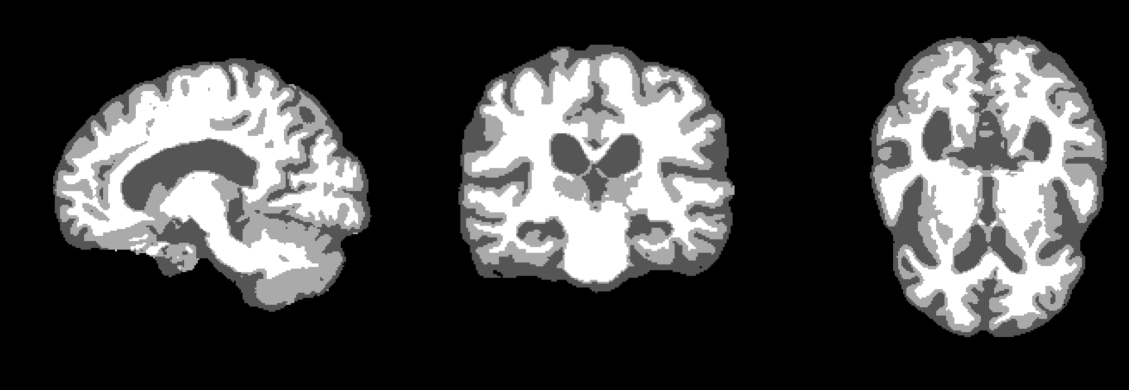

In [11]:
plt.rcParams['figure.facecolor'] = 'black'
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(np.rot90(fill_test[66, :, :],-1),'gray')
axes[1].imshow(np.rot90(fill_test[:, 100, :],-1),'gray')
axes[2].imshow(np.rot90(fill_test[:, :, 100],-1),'gray')
for ax in axes.flatten():
    ax.set_axis_off()
    ax.grid(False)
fig.tight_layout()
plt.show()